In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIC9ZMC/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIC9ZMC/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIC9ZMC/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder


In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 224s 569ms/step - loss: 0.4597 - accuracy: 0.7662 - val_loss: 0.3171 - val_accuracy: 0.8704
Epoch 2/10
391/391 [==============================] - 224s 572ms/step - loss: 0.2239 - accuracy: 0.9156 - val_loss: 0.3014 - val_accuracy: 0.8768
Epoch 3/10
391/391 [==============================] - 225s 574ms/step - loss: 0.1670 - accuracy: 0.9393 - val_loss: 0.3271 - val_accuracy: 0.8764
Epoch 4/10
391/391 [==============================] - 222s 567ms/step - loss: 0.1347 - accuracy: 0.9539 - val_loss: 0.3731 - val_accuracy: 0.8702
Epoch 5/10
391/391 [==============================] - 221s 564ms/step - loss: 0.1074 - accuracy: 0.9632 - val_loss: 0.4857 - val_accuracy: 0.8617
Epoch 6/10
391/391 [==============================] - 222s 566ms/step - loss: 0.0885 - accuracy: 0.9714 - val_loss: 0.5319 - val_accuracy: 0.8625
Epoch 7/10
391/391 [==============================] - 220s 562ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.5508 -

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

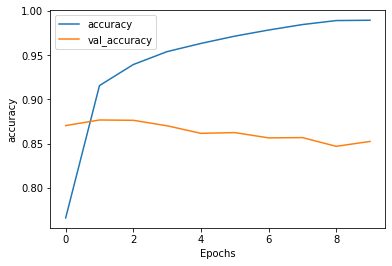

In [8]:
plot_graphs(history, 'accuracy')

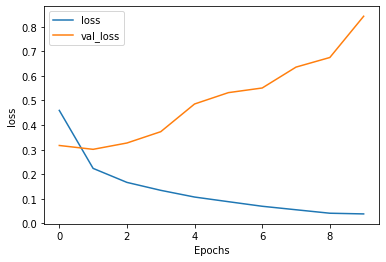

In [9]:
plot_graphs(history, 'loss')